In [7]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torchvision import models
# import os
# import json
# # import matplotlib.colors as mc
# # import matplotlib.pyplot as plt
# import time 
# from tqdm.auto import tqdm
# from scipy.ndimage import gaussian_filter1d, median_filter
# import math

# from estimators import *
# from utils import *
# from utils_2 import *
# from models_augmented import *
# from utils_data_generator import *
# from utils_training import *
# from h5_result_store import H5ResultStore


# import warnings
# warnings.filterwarnings("ignore")

# import torch

# ## dataset_type = "joint_gaussian", "guassian_mixtures_ring", "circular_hypershell"
# ## critic_type = "separable", "separable_augmented", "concatanated", "hybrid"




# def main():
#     est = 'lclip'
#     batch_size=128
#     n_trials =10
#     dzx = 1
#     dzy = 1
#     mutual_info_real=2*np.log(2)
#     rho_s = math.sqrt(1.0 - math.exp(-2.0 * mutual_info_real/dzx))
#     sig = 1.0
#     mu = 10.0
#     n_peaks = 16
#     n_iter= 200

#     K_observed_dim = 500


#     teacher_model_x = teacher(dz=dzx, output_dim=K_observed_dim)
#     teacher_model_y = teacher(dz=dzy, output_dim=K_observed_dim)
#     teacher_model_x = teacher_model_x.to('cuda')
#     teacher_model_y = teacher_model_y.to('cuda')

#     for param_x in teacher_model_x.parameters():
#         param_x.requires_grad_(False)  # Freeze
#     for param_y in teacher_model_y.parameters():
#         param_y.requires_grad_(False)

        
#     data_generator = lambda sample_size: sample_ring_mixture_embded_teacher(sample_size, n_peaks, mu=mu, rho=rho_s, sig=sig, mlp_x = teacher_model_x, mlp_y = teacher_model_y)

#     kz_list = range(1, 20, 1)

#     for model_type in ['hybrid', 'sep']:
#         for kz in kz_list:
#             for trial_num in range(n_trials):
#                 print(f'kz = {kz}')
                
#                 torch.cuda.empty_cache()
#                 base_critic_params = {
#                         'Nx': K_observed_dim,
#                         'Ny': K_observed_dim,
#                         'layers': 2,
#                         'embed_dim': kz,
#                         'hidden_dim': 64,
#                         'activation': 'leaky_relu',
#                         'quad_kind': 'full',
#                     }
                
#                 dsib_model = DSIB(est, base_critic_params, model_type, None)
                    
#                 estimates_mi = train_model_generate_data(dsib_model, data_generator, batch_size, n_iter, show_progress=True)
#                 mis_dsib_bits = -np.array(estimates_mi)*np.log2(np.e)            
            
#                 with H5ResultStore("h5_results/gaussian_mixtures_infinite_data_large_observe_dim_1.h5") as rs:
#                     rid = rs.new_run(
#                         params={
#                             "base_critic_params": base_critic_params,                    
#                         },
#                         tags={
#                             "estimator": est,          # 'lclip' | 'infonce' | 'smile_5'
#                             "model":     model_type,   
#                             "batch_size": batch_size,
#                             "mu":mu,
#                             "rho_s":rho_s,
#                             "mutual_info_real":mutual_info_real,
#                             "sig":sig,
#                             "n_peaks":n_peaks,
#                             "n_iter": n_iter,
#                             "trial_num": trial_num,
#                         },
#                         dedupe_on_fingerprint=False  # set True if you want to reuse identical runs
#                     )
                
#                     # Save whatever arrays you like under this run:
#                     rs.save_array(rid, "mi_bits", mis_dsib_bits)       
            

In [35]:

# def run_parameter_sweep():
#     outfile = "h5_results/test_2.h5"
#     dataset_type = "gaussian_mixture"
#     latent_dim = 1
#     for trial_num in range(3):
#         for kz in range(1,20,2):
#             for critic_type in ["hybrid", "separable"]:

#                 if critic_type == "hybrid" and kz == 0:
#                     continue  
                    
#                 mis_dsib_bits = run_single_experiment_dsib_infinite(kz = kz, critic_type = critic_type, outfile=outfile, trial_num=trial_num, dataset_type=dataset_type, latent_dim = latent_dim)
#                 print(f'Run with kz = {kz}, critic_type: {critic_type};  dataset_type: {dataset_type}; Saved to {outfile}')



# run_parameter_sweep()



In [36]:
# from critic_config import make_critic
# from models import *
# from utils_training import *
# from utils_data_generator import *
# from utils import *
# import math
# import matplotlib.pyplot as plt
# from config_defaults import CRITIC_DEFAULTS, DATASET_DEFAULTS
# from h5_result_store import H5ResultStore


In [2]:
# estimator = "lclip"
# batch_size=128
# n_iter=2000
# K_observed_dim =500
# latent_dim = 1
# critic_type = "hybrid"
# dataset_type = "gaussian_mixture"
# kz = 2
# mi_bits=2.0
# trial_num=0
# outfile = "h5_results/gaussian_mixtures_infinite_data_large_observe_dim_1.h5"

# ##################################

# Nx = K_observed_dim
# Ny = K_observed_dim
# dzx = latent_dim
# dzy = latent_dim


# ##################################

# teacher_model_x = teacher(dz=dzx, output_dim=K_observed_dim)
# teacher_model_y = teacher(dz=dzy, output_dim=K_observed_dim)
# teacher_model_x = teacher_model_x.to('cuda')
# teacher_model_y = teacher_model_y.to('cuda')

# for param_x in teacher_model_x.parameters():
#     param_x.requires_grad_(False)  # Freeze
# for param_y in teacher_model_y.parameters():
#     param_y.requires_grad_(False)


In [3]:
# ##################################
# critic_cfg = {
#     **CRITIC_DEFAULTS[critic_type],
#     "embed_dim": kz,
#     "Nx": Nx,
#     "Ny": Ny,
# }
# critic, critic_params, critic_tags = make_critic(critic_type, **critic_cfg)

# ##################################
# mutual_info_real=mi_bits*np.log(2)
# rho_s = math.sqrt(1.0 - math.exp(-2.0 * mutual_info_real/latent_dim))
# user_cfg = {"rho": rho_s} # add noise as "sig_embed" 

# dataset_cfg = {**DATASET_DEFAULTS[dataset_type], **user_cfg}
# data_generator = make_data_generator(dataset_type, dataset_cfg, teacher_model_x, teacher_model_y)


In [27]:
# model = DSIB(estimator=estimator, critic=critic)

# estimates_mi = train_model_generate_data(
#     model,
#     data_generator,
#     batch_size,
#     n_iter,
#     show_progress=True,
#     )

100%|██████████| 2000/2000 [00:06<00:00, 297.63it/s]


In [32]:
# print(critic_type)
# print(critic_cfg)
# print(dataset_type)
# print(dataset_cfg)

# mis_dsib_bits = -np.array(estimates_mi)*np.log2(np.e)            


# plt.plot(mis_dsib_bits)
# plt.show()

In [41]:
# with H5ResultStore(outfile) as rs:
#     params={
#         "method": "dsib",

#         "critic_type": critic_type,
#         "critic_cfg": critic_cfg,
#         "critic_params": critic_params,

#         "dataset_type": dataset_type,
#         "dataset_cfg": dataset_cfg,

#         "training_cfg": {
#             "setup": "infinite_data_iter",
#             "estimator": estimator,        # 'lclip'
#             "batch_size": batch_size,
#             "n_iter": n_iter,
#         },
#         "mutual_info_real": mutual_info_real,            
#     }
    
#     tags={
#         # fast filters / group-by keys
#         "method": "dsib",
#         "critic_type": critic_type,
#         "dataset_type": dataset_type,
#         "estimator": estimator,

#         "kz": critic_cfg["embed_dim"],
#         "batch_size": batch_size,
#         "n_iter": n_iter,
#         "sig_embed": dataset_cfg.get("sig_embed", 0.0),
#         "rho": dataset_cfg.get("rho", None),
#         "trial_num": trial_num,
        
#     }

#     if dataset_type == "gaussian_mixture":
#         tags.update({
#             "rho": dataset_cfg["rho"],
#             "n_peaks": dataset_cfg["n_peaks"],
#             "mu": dataset_cfg["mu"],
#             "sig": dataset_cfg["sig"],
#         })
#     elif dataset_type == "joint_gaussian":
#         tags.update({
#             "rho": dataset_cfg["rho"],
#             "latent_dim": dataset_cfg["latent_dim"],
#         })
#     elif dataset_type == "ring_with_spread":
#         tags.update({
#             "mu": dataset_cfg["mu"],
#             "radial_std": dataset_cfg["radial_std"],
#         })

    
#     rid = rs.new_run(params=params, tags=tags, dedupe_on_fingerprint=False)
#     rs.save_array(rid, "mi_bits", mis_dsib_bits)


In [42]:
# import pandas as pd
# results = []

# filter_plots = {}
# with H5ResultStore(outfile, "r") as rs:
#     rids = rs.query(where={})
#     print(f'Found {len(rids)} results matching filters')
#     for rid in rids:
#         meta = rs.get_meta(rid)
#         # print(meta)
#         # print('\n')
    


Found 6 results matching filters


In [23]:
# from critic_config import make_critic
# from models import *
# from utils_training import *
# from utils_data_generator import *
# from utils import *
# import math
# import matplotlib.pyplot as plt
# from config_defaults import CRITIC_DEFAULTS, DATASET_DEFAULTS
# from h5_result_store import H5ResultStore



# def run_single_experiment_dsib_infinite(
#     estimator: str = "lclip",
#     critic_type = "hybrid",
#     batch_size=128,
#     n_iter=2000,
#     K_observed_dim =500,
#     latent_dim = 1,
#     dataset_type = "gaussian_mixture",
#     kz = 2,
#     mi_bits=2.0,
#     trial_num=0,
#     outfile = "h5_results/test_output.h5"
# ):

#     ### intermediate params ##################################

#     Nx = K_observed_dim
#     Ny = K_observed_dim
#     dzx = latent_dim
#     dzy = latent_dim


#     ##################################

#     teacher_model_x = teacher(dz=dzx, output_dim=K_observed_dim)
#     teacher_model_y = teacher(dz=dzy, output_dim=K_observed_dim)
#     teacher_model_x = teacher_model_x.to('cuda')
#     teacher_model_y = teacher_model_y.to('cuda')

#     for param_x in teacher_model_x.parameters():
#         param_x.requires_grad_(False)  # Freeze
#     for param_y in teacher_model_y.parameters():
#         param_y.requires_grad_(False)


#     ##################################
#     critic_cfg = {
#         **CRITIC_DEFAULTS[critic_type],
#         "embed_dim": kz,
#         "Nx": Nx,
#         "Ny": Ny,
#     }
#     critic, critic_params, critic_tags = make_critic(critic_type, **critic_cfg)

#     ##################################
#     if dataset_type == "gaussian_mixture":
#         mutual_info_real=mi_bits*np.log(2)
#         rho_s = math.sqrt(1.0 - math.exp(-2.0 * mutual_info_real/latent_dim))
#         user_cfg = {"rho": rho_s, "sig_embed": 0.0} 
    
#         dataset_cfg = {**DATASET_DEFAULTS[dataset_type], **user_cfg}
#         data_generator = make_data_generator(dataset_type, dataset_cfg, teacher_model_x, teacher_model_y)
#     elif dataset_type == "ring_with_spread":
#         user_cfg = {"sig_embed": 0.0} 
    
#         dataset_cfg = {**DATASET_DEFAULTS[dataset_type], **user_cfg}
#         data_generator = make_data_generator(dataset_type, dataset_cfg, teacher_model_x, teacher_model_y)

#     elif dataset_type == "joint_gaussian":
#         mutual_info_real=mi_bits*np.log(2)
#         rho_s = math.sqrt(1.0 - math.exp(-2.0 * mutual_info_real/latent_dim))
#         user_cfg = {"rho": rho_s, "sig_embed": 0.0, "latent_dim":latent_dim} 
#         dataset_cfg = {**DATASET_DEFAULTS[dataset_type], **user_cfg}
#         data_generator = make_data_generator(dataset_type, dataset_cfg, teacher_model_x, teacher_model_y)

#     else:
#         raise ValueError(f"Invalid dataset_type '{dataset_type}'. Try again :)")
   

#     ###################################
#     model = DSIB(estimator=estimator, critic=critic)

#     estimates_mi = train_model_generate_data(
#         model,
#         data_generator,
#         batch_size,
#         n_iter,
#         show_progress=True,
#         )

#     mis_dsib_bits = -np.array(estimates_mi)*np.log2(np.e)            


#     with H5ResultStore(outfile) as rs:
#         params={
#             "method": "dsib",

#             "critic_type": critic_type,
#             "critic_cfg": critic_cfg,
#             "critic_params": critic_params,

#             "dataset_type": dataset_type,
#             "dataset_cfg": dataset_cfg,

#             "training_cfg": {
#                 "setup": "infinite_data_iter",
#                 "estimator": estimator,        # 'lclip'
#                 "batch_size": batch_size,
#                 "n_iter": n_iter,
#             },
#         }
        
#         tags={
#             # fast filters / group-by keys
#             "method": "dsib",
#             "critic_type": critic_type,
#             "dataset_type": dataset_type,
#             "estimator": estimator,

#             "kz": critic_cfg["embed_dim"],
#             "batch_size": batch_size,
#             "n_iter": n_iter,
#             "sig_embed": dataset_cfg.get("sig_embed", 0.0),
#             "rho": dataset_cfg.get("rho", None),
#             "trial_num": trial_num,
            
#         }

#         if dataset_type == "gaussian_mixture":
#             tags.update({
#                 "rho": dataset_cfg["rho"],
#                 "n_peaks": dataset_cfg["n_peaks"],
#                 "mu": dataset_cfg["mu"],
#                 "sig": dataset_cfg["sig"],
#                 "mi_bits_singular": mi_bits,            
#             })
#         elif dataset_type == "joint_gaussian":
#             tags.update({
#                 "rho": dataset_cfg["rho"],
#                 "latent_dim": dataset_cfg["latent_dim"],
#                 "mi_bits": mi_bits,            
#             })
#         elif dataset_type == "ring_with_spread":
#             tags.update({
#                 "mu": dataset_cfg["mu"],
#                 "radial_std": dataset_cfg["radial_std"],
#             })

        
#         rid = rs.new_run(params=params, tags=tags, dedupe_on_fingerprint=False)
#         rs.save_array(rid, "mi_bits", mis_dsib_bits)

#     return mis_dsib_bits







In [1]:
from critic_config import make_critic
from models import *
from utils_training import *
from utils_data_generator import *
from utils import *
import math
import matplotlib.pyplot as plt
from config_defaults import CRITIC_DEFAULTS, DATASET_DEFAULTS
from h5_result_store import H5ResultStore
import torch
import numpy as np
import random


## TO-DO: Add argparse to do this systematically when calling the run file from a job
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def run_single_experiment_dsib_infinite(
    estimator: str = "lclip",
    critic_type = "hybrid",
    batch_size=128,
    n_iter=2000,
    K_observed_dim =500,
    latent_dim = 1,
    dataset_type = "gaussian_mixture",
    kz = 2,
    mi_bits=2.0,
    trial_num=0,
    outfile = "h5_results/test_output.h5",
    optimizer_cls=torch.optim.Adam, 
    lr=5e-4, 
    optimizer_kwargs=None
):

    ## initialize seed
    seed = np.random.randint(0, 2**32 - 1) # log this seed in the h5 output and other trianing parameters
    set_seed(seed)

    ### intermediate params ##################################
    Nx = K_observed_dim
    Ny = K_observed_dim
    dzx = latent_dim
    dzy = latent_dim


    ##################################

    teacher_model_x = teacher(dz=dzx, output_dim=K_observed_dim)
    teacher_model_y = teacher(dz=dzy, output_dim=K_observed_dim)
    teacher_model_x = teacher_model_x.to('cuda')
    teacher_model_y = teacher_model_y.to('cuda')

    for param_x in teacher_model_x.parameters():
        param_x.requires_grad_(False)  # Freeze
    for param_y in teacher_model_y.parameters():
        param_y.requires_grad_(False)


    ################################## To-do: these need to be passes
    critic_cfg = {
        **CRITIC_DEFAULTS[critic_type],
        "embed_dim": kz,
        "Nx": Nx,
        "Ny": Ny,
    }
    critic, critic_params, critic_tags = make_critic(critic_type, **critic_cfg)

    ##################################
    if dataset_type == "gaussian_mixture":
        mutual_info_real=mi_bits*np.log(2)
        rho_s = math.sqrt(1.0 - math.exp(-2.0 * mutual_info_real/latent_dim))
        user_cfg = {"rho": rho_s, "sig_embed": 0.0} 
    
        dataset_cfg = {**DATASET_DEFAULTS[dataset_type], **user_cfg}
        data_generator = make_data_generator(dataset_type, dataset_cfg, teacher_model_x, teacher_model_y)
    elif dataset_type == "ring_with_spread":
        user_cfg = {"sig_embed": 0.0} 
    
        dataset_cfg = {**DATASET_DEFAULTS[dataset_type], **user_cfg}
        data_generator = make_data_generator(dataset_type, dataset_cfg, teacher_model_x, teacher_model_y)

    elif dataset_type == "joint_gaussian":
        mutual_info_real=mi_bits*np.log(2)
        rho_s = math.sqrt(1.0 - math.exp(-2.0 * mutual_info_real/latent_dim))
        user_cfg = {"rho": rho_s, "sig_embed": 0.0, "latent_dim":latent_dim} 
        dataset_cfg = {**DATASET_DEFAULTS[dataset_type], **user_cfg}
        data_generator = make_data_generator(dataset_type, dataset_cfg, teacher_model_x, teacher_model_y)
   

    ###################################
    model = DSIB(estimator=estimator, critic=critic)

    estimates_mi = train_model_generate_data(
        model,
        data_generator,
        batch_size,
        n_iter,
        show_progress=True,
        optimizer_cls=optimizer_cls, 
        lr=lr, 
        optimizer_kwargs=optimizer_kwargs
        )

    mis_dsib_bits = -np.array(estimates_mi)*np.log2(np.e)            


    with H5ResultStore(outfile) as rs:
        params={
            "method": "dsib",

            "critic_type": critic_type,
            "critic_cfg": critic_cfg,
            "critic_params": critic_params,

            "dataset_type": dataset_type,
            "dataset_cfg": dataset_cfg,

            "training_cfg": {
                "setup": "infinite_data_iter",
                "estimator": estimator,        # 'lclip'
                "batch_size": batch_size,
                "n_iter": n_iter,
            },
            "training": {
                "optimizer": optimizer_cls.__name__,
                "lr": lr,
                "batch_size": batch_size,
                "n_iter": n_iter,
                "seed": seed,
            }
        }
        
        tags={
            # fast filters / group-by keys
            "method": "dsib",
            "critic_type": critic_type,
            "dataset_type": dataset_type,
            "estimator": estimator,

            "kz": critic_cfg["embed_dim"],
            "batch_size": batch_size,
            "n_iter": n_iter,
            "sig_embed": dataset_cfg.get("sig_embed", 0.0),
            "rho": dataset_cfg.get("rho", None),
            "trial_num": trial_num,
            
        }

        if dataset_type == "gaussian_mixture":
            tags.update({
                "rho": dataset_cfg["rho"],
                "n_peaks": dataset_cfg["n_peaks"],
                "mu": dataset_cfg["mu"],
                "sig": dataset_cfg["sig"],
                "mi_bits_singular": mi_bits,            
            })
        elif dataset_type == "joint_gaussian":
            tags.update({
                "rho": dataset_cfg["rho"],
                "latent_dim": dataset_cfg["latent_dim"],
                "mi_bits": mi_bits,            
            })
        elif dataset_type == "ring_with_spread":
            tags.update({
                "mu": dataset_cfg["mu"],
                "radial_std": dataset_cfg["radial_std"],
            })

        
        rid = rs.new_run(params=params, tags=tags, dedupe_on_fingerprint=False)
        rs.save_array(rid, "mi_bits", mis_dsib_bits)

    return mis_dsib_bits



/users/pgulat4/.conda/envs/MI_estimation/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def run_parameter_sweep():
    outfile = "h5_results/gaussian_mixtures_infinite_data_large_observe_dim.h5"
    dataset_type = "gaussian_mixture"
    latent_dim = 1
    for trial_num in range(3):
        for kz in range(1,20,2):
            for critic_type in ["hybrid"]:

                if critic_type == "hybrid" and kz == 0:
                    continue  
                    
                mis_dsib_bits = run_single_experiment_dsib_infinite(kz = kz, critic_type = critic_type, outfile=outfile, trial_num=trial_num, dataset_type=dataset_type, latent_dim = latent_dim)
                print(f'Run with kz = {kz}, critic_type: {critic_type};  dataset_type: {dataset_type}; Saved to {outfile}')



In [ ]:
def run_parameter_sweep():
    outfile = "h5_results/test_3.h5"
    dataset_type = "ring_with_spread"
    for trial_num in range(3):
        for kz in range(1,5,1):
            for critic_type in ["hybrid", "separable"]:

                if critic_type == "hybrid" and kz == 0:
                    continue  
                    
                mis_dsib_bits = run_single_experiment_dsib_infinite(kz = kz, critic_type = critic_type, outfile=outfile, trial_num=trial_num, dataset_type=dataset_type)
                print(f'Run with kz = {kz}, critic_type: {critic_type};  dataset_type: {dataset_type}; Saved to {outfile}')



In [92]:
def run_parameter_sweep():
    outfile = "h5_results/test_4.h5"
    dataset_type = "joint_gaussian"
    latent_dim = 8
    n_iter=50_000
    
    for trial_num in range(5):
        for kz in range(8, 10, 2):
            for critic_type in ["hybrid"]:

                if critic_type == "hybrid" and kz == 0:
                    continue  
                    
                mis_dsib_bits = run_single_experiment_dsib_infinite(kz = kz, critic_type = critic_type, outfile=outfile, trial_num=trial_num, dataset_type=dataset_type, latent_dim = latent_dim, n_iter=n_iter)
                print(f'Run with kz = {kz}, critic_type: {critic_type};  dataset_type: {dataset_type}; Saved to {outfile}')



In [93]:
run_parameter_sweep()

100%|██████████| 50000/50000 [02:44<00:00, 303.99it/s]


Run with kz = 8, critic_type: hybrid;  dataset_type: joint_gaussian; Saved to h5_results/test_4.h5


100%|██████████| 50000/50000 [02:44<00:00, 304.08it/s]


Run with kz = 8, critic_type: hybrid;  dataset_type: joint_gaussian; Saved to h5_results/test_4.h5


100%|██████████| 50000/50000 [02:44<00:00, 304.87it/s]


Run with kz = 8, critic_type: hybrid;  dataset_type: joint_gaussian; Saved to h5_results/test_4.h5


100%|██████████| 50000/50000 [02:43<00:00, 304.99it/s]


Run with kz = 8, critic_type: hybrid;  dataset_type: joint_gaussian; Saved to h5_results/test_4.h5


100%|██████████| 50000/50000 [02:43<00:00, 305.68it/s]

Run with kz = 8, critic_type: hybrid;  dataset_type: joint_gaussian; Saved to h5_results/test_4.h5


In [8]:
# outfile = "h5_results/gaussian_mixtures_infinite_data_large_observe_dim.h5"

In [113]:
# import pandas as pd
# results = []

# filter_plots = {}
# with H5ResultStore(outfile, "r") as rs:
#     rids = rs.query(where={})
#     print(f'Found {len(rids)} results matching filters')
#     for rid in rids:
#         meta = rs.get_meta(rid)
#         # print(meta)
#         # print('\n')
    


Found 106 results matching filters


In [38]:
# meta['params']

In [39]:
meta['tags']

{'method': 'dsib',
 'critic_type': 'hybrid',
 'dataset_type': 'ring_with_spread',
 'estimator': 'lclip',
 'kz': 1,
 'batch_size': 128,
 'n_iter': 2000,
 'sig_embed': 0.0,
 'rho': None,
 'trial_num': 0,
 'mu': 4.0,
 'radial_std': 0.1}

In [20]:
# from tqdm.notebook import tqdm
# from scipy.ndimage import gaussian_filter1d, median_filter
# from matplotlib.ticker import MaxNLocator

# EMA_SPAN = 20

In [71]:
# results = []
# kz_list = range(20)
# est= 'lclip'
# dataset_type = 'gaussian_mixture'
# n_peaks = 8
# mu=2.0
# n_iter=2_000
# sig_embed = 0.0
# with H5ResultStore(outfile, "r") as rs:
#     for critic_type in ['hybrid', 'separable']:
#         for kz in kz_list:
#             where = {
#             "tags.critic_type": critic_type,
#             "tags.estimator": est,
#             "tags.dataset_type": dataset_type,
#             "tags.n_peaks": n_peaks,
#             "tags.mu": mu,
#             "tags.kz": kz,
#             "tags.n_iter": n_iter,
#             "tags.sig_embed": sig_embed,                
#             }
                    
#             rids = rs.query(where=where)
    
#             for rid in rids:
                            
#                 meta = rs.get_meta(rid)
#                 mis_dsib_bits  = rs.load_array(rid, "mi_bits")
#                 max_smoothed_info= np.max(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits), size=EMA_SPAN), sigma=1))
#                 std_smoothed_info= np.std(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits[-int(n_iter/2):-1]), size=int(EMA_SPAN)), sigma=1))
        
#                 new_entry = {
#                 "critic_type": critic_type,
#                 "max_smoothed_info": max_smoothed_info, 
#                 "std_smoothed_info": std_smoothed_info,
#                 "embed_dim": kz,
#                 }
#                 results.append(new_entry)

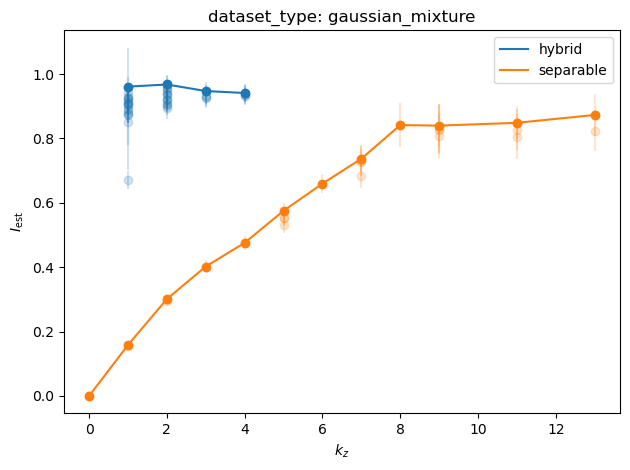

In [72]:
# results_df = pd.DataFrame(results)

# fig, ax = plt.subplots()
# for critic_type, df_sub in results_df.groupby("critic_type"):

            
#     axerr,_,_ = ax.errorbar(
#         df_sub["embed_dim"],
#         df_sub["max_smoothed_info"],
#         yerr= df_sub["std_smoothed_info"],
#         fmt='o', alpha=0.2)

#     # compute mean ± std
#     agg = (
#         df_sub.groupby("embed_dim")["max_smoothed_info"]
#         .agg(["max"])
#         .reset_index()
#     )

#     label = f"{critic_type}"


#     ax.plot(
#         agg["embed_dim"],
#         agg["max"],
#         label=label,
#         linewidth=1.5,  c=axerr.get_color()
#         )
#     ax.scatter(
#         agg["embed_dim"],
#         agg["max"],
#         c=axerr.get_color(), 
#         alpha=1.0
#         )

# # ax.axvline(low_dim, c='k', ls='--')
# # formatting
# # ax.set_xscale("log")
# ax.set_xlabel(r"$k_z$")
# ax.set_ylabel(r"$I_{\rm est}$")
# ax.legend()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_title(f'dataset_type: {dataset_type}' )
# # ax.set_ylim([0, 1.5])
# plt.tight_layout()
# plt.show()

In [10]:
# meta

{'params': {'method': 'dsib',
  'critic_type': 'hybrid',
  'critic_cfg': {'embed_dim': 1,
   'activation': 'leaky_relu',
   'x_hidden_dim': 128,
   'x_layers': 2,
   'y_hidden_dim': 128,
   'y_layers': 2,
   'pair_hidden_dim': 64,
   'pair_layers': 1,
   'Nx': 500,
   'Ny': 500},
  'critic_params': {'Nx': 500,
   'Ny': 500,
   'embed_dim': 1,
   'x_hidden_dim': 128,
   'x_layers': 2,
   'y_hidden_dim': 128,
   'y_layers': 2,
   'pair_hidden_dim': 64,
   'pair_layers': 1,
   'activation': 'leaky_relu'},
  'dataset_type': 'ring_with_spread',
  'dataset_cfg': {'mu': 4.0,
   'radial_std': 0.1,
   'sig_embed': 0.0,
   'noise_mode': 'white_relative'},
  'training_cfg': {'setup': 'infinite_data_iter',
   'estimator': 'lclip',
   'batch_size': 128,
   'n_iter': 2000}},
 'tags': {'method': 'dsib',
  'critic_type': 'hybrid',
  'dataset_type': 'ring_with_spread',
  'estimator': 'lclip',
  'kz': 1,
  'batch_size': 128,
  'n_iter': 2000,
  'sig_embed': 0.0,
  'rho': None,
  'trial_num': 0,
  'mu': 

In [9]:
# results = []
# kz_list = range(20)
# est= 'lclip'
# dataset_type = 'ring_with_spread'
# n_iter=2_000
# sig_embed = 0.0

# with H5ResultStore(outfile, "r") as rs:
#     for critic_type in ['hybrid', 'separable']:
#         for kz in kz_list:
#             where = {
#             "tags.critic_type": critic_type,
#             "tags.estimator": est,
#             "tags.dataset_type": dataset_type,
#             "tags.kz": kz,
#             "tags.n_iter": n_iter,
#             "tags.sig_embed": sig_embed,                
#             }
                    
#             rids = rs.query(where=where)
    
#             for rid in rids:
                            
#                 meta = rs.get_meta(rid)
#                 mis_dsib_bits  = rs.load_array(rid, "mi_bits")
#                 max_smoothed_info= np.max(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits), size=EMA_SPAN), sigma=1))
#                 std_smoothed_info= np.std(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits[-int(n_iter/2):-1]), size=int(EMA_SPAN)), sigma=1))
        
#                 new_entry = {
#                 "critic_type": critic_type,
#                 "max_smoothed_info": max_smoothed_info, 
#                 "std_smoothed_info": std_smoothed_info,
#                 "embed_dim": kz,
#                 }
#                 results.append(new_entry)

NameError: name 'gaussian_filter1d' is not defined

In [ ]:
# results_df = pd.DataFrame(results)

# fig, ax = plt.subplots()
# for critic_type, df_sub in results_df.groupby("critic_type"):

            
#     axerr,_,_ = ax.errorbar(
#         df_sub["embed_dim"],
#         df_sub["max_smoothed_info"],
#         yerr= df_sub["std_smoothed_info"],
#         fmt='o', alpha=0.2)

#     # compute mean ± std
#     agg = (
#         df_sub.groupby("embed_dim")["max_smoothed_info"]
#         .agg(["max"])
#         .reset_index()
#     )

#     label = f"{critic_type}"


#     ax.plot(
#         agg["embed_dim"],
#         agg["max"],
#         label=label,
#         linewidth=1.5,  c=axerr.get_color()
#         )
#     ax.scatter(
#         agg["embed_dim"],
#         agg["max"],
#         c=axerr.get_color(), 
#         alpha=1.0
#         )

# # ax.axvline(low_dim, c='k', ls='--')
# # formatting
# # ax.set_xscale("log")
# ax.set_xlabel(r"$k_z$")
# ax.set_ylabel(r"$I_{\rm est}$")
# ax.legend()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_title(f'dataset_type: {dataset_type}' )
# plt.tight_layout()
# plt.show()

In [95]:
# results = []
# kz_list = range(20)
# est= 'lclip'
# dataset_type = 'joint_gaussian'
# n_iter=2_000
# sig_embed = 0.0
# latent_dim = 1
# mi_bits = 2.0

# with H5ResultStore(outfile, "r") as rs:
#     for critic_type in ['hybrid', 'separable']:
#         for kz in kz_list:
#             where = {
#             "tags.critic_type": critic_type,
#             "tags.estimator": est,
#             "tags.dataset_type": dataset_type,
#             "tags.kz": kz,
#             "tags.n_iter": n_iter,
#             "tags.sig_embed": sig_embed,                
#             "tags.mi_bits": mi_bits,                
#             "tags.latent_dim": latent_dim,                
#             }
                    
#             rids = rs.query(where=where)
    
#             for rid in rids:
                            
#                 meta = rs.get_meta(rid)
#                 mis_dsib_bits  = rs.load_array(rid, "mi_bits")
#                 max_smoothed_info= np.max(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits), size=EMA_SPAN), sigma=1))
#                 std_smoothed_info= np.std(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits[-int(n_iter/2):-1]), size=int(EMA_SPAN)), sigma=1))
        
#                 new_entry = {
#                 "critic_type": critic_type,
#                 "max_smoothed_info": max_smoothed_info, 
#                 "std_smoothed_info": std_smoothed_info,
#                 "embed_dim": kz,
#                 }
#                 results.append(new_entry)

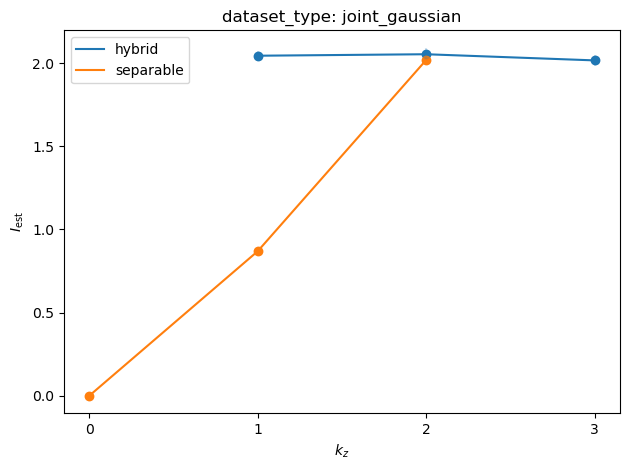

In [96]:
# results_df = pd.DataFrame(results)

# fig, ax = plt.subplots()
# for critic_type, df_sub in results_df.groupby("critic_type"):

            
#     axerr,_,_ = ax.errorbar(
#         df_sub["embed_dim"],
#         df_sub["max_smoothed_info"],
#         yerr= df_sub["std_smoothed_info"],
#         fmt='o', alpha=0.2)

#     # compute mean ± std
#     agg = (
#         df_sub.groupby("embed_dim")["max_smoothed_info"]
#         .agg(["max"])
#         .reset_index()
#     )

#     label = f"{critic_type}"


#     ax.plot(
#         agg["embed_dim"],
#         agg["max"],
#         label=label,
#         linewidth=1.5,  c=axerr.get_color()
#         )
#     ax.scatter(
#         agg["embed_dim"],
#         agg["max"],
#         c=axerr.get_color(), 
#         alpha=1.0
#         )

# # ax.axvline(low_dim, c='k', ls='--')
# # formatting
# # ax.set_xscale("log")
# ax.set_xlabel(r"$k_z$")
# ax.set_ylabel(r"$I_{\rm est}$")
# ax.legend()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_title(f'dataset_type: {dataset_type}' )
# plt.tight_layout()
# plt.show()

1.3862943611198906

In [107]:
# results = []
# kz_list = range(20)
# est= 'lclip'
# dataset_type = 'joint_gaussian'
# n_iter=2_000
# sig_embed = 0.0
# latent_dim = 2
# mi_bits = 2.0

# with H5ResultStore(outfile, "r") as rs:
#     for critic_type in ['hybrid', 'separable']:
#         for kz in kz_list:
#             where = {
#             "tags.critic_type": critic_type,
#             "tags.estimator": est,
#             "tags.dataset_type": dataset_type,
#             "tags.kz": kz,
#             "tags.n_iter": n_iter,
#             "tags.sig_embed": sig_embed,                
#             "tags.mi_bits": mi_bits,                
#             "tags.latent_dim": latent_dim,                
#             }
                    
#             rids = rs.query(where=where)
    
#             for rid in rids:
                            
#                 meta = rs.get_meta(rid)
#                 mis_dsib_bits  = rs.load_array(rid, "mi_bits")
#                 max_smoothed_info= np.max(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits), size=EMA_SPAN), sigma=1))
#                 std_smoothed_info= np.std(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits[-int(n_iter/2):-1]), size=int(EMA_SPAN)), sigma=1))
        
#                 new_entry = {
#                 "critic_type": critic_type,
#                 "max_smoothed_info": max_smoothed_info, 
#                 "std_smoothed_info": std_smoothed_info,
#                 "embed_dim": kz,
#                 }
#                 results.append(new_entry)

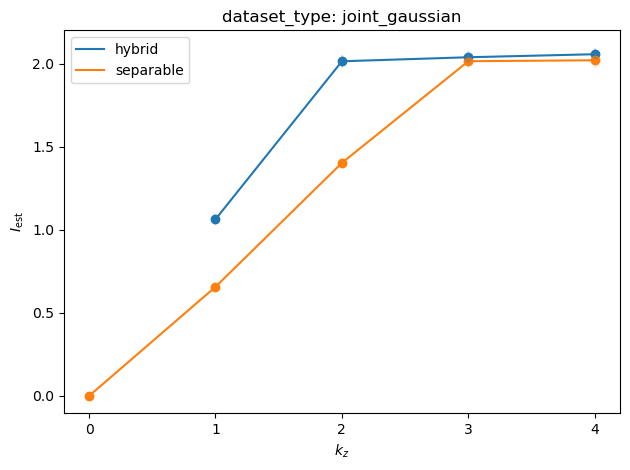

In [108]:
# results_df = pd.DataFrame(results)

# fig, ax = plt.subplots()
# for critic_type, df_sub in results_df.groupby("critic_type"):

            
#     axerr,_,_ = ax.errorbar(
#         df_sub["embed_dim"],
#         df_sub["max_smoothed_info"],
#         yerr= df_sub["std_smoothed_info"],
#         fmt='o', alpha=0.2)

#     # compute mean ± std
#     agg = (
#         df_sub.groupby("embed_dim")["max_smoothed_info"]
#         .agg(["max"])
#         .reset_index()
#     )

#     label = f"{critic_type}"


#     ax.plot(
#         agg["embed_dim"],
#         agg["max"],
#         label=label,
#         linewidth=1.5,  c=axerr.get_color()
#         )
#     ax.scatter(
#         agg["embed_dim"],
#         agg["max"],
#         c=axerr.get_color(), 
#         alpha=1.0
#         )

# # ax.axvline(low_dim, c='k', ls='--')
# # formatting
# # ax.set_xscale("log")
# ax.set_xlabel(r"$k_z$")
# ax.set_ylabel(r"$I_{\rm est}$")
# ax.legend()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_title(f'dataset_type: {dataset_type}' )
# plt.tight_layout()
# plt.show()

In [117]:
# results = []
# kz_list = range(20)
# est= 'lclip'
# dataset_type = 'joint_gaussian'
# n_iter=2_000
# sig_embed = 0.0
# latent_dim = 4
# mi_bits = 2.0

# with H5ResultStore(outfile, "r") as rs:
#     for critic_type in ['hybrid', 'separable']:
#         for kz in kz_list:
#             where = {
#             "tags.critic_type": critic_type,
#             "tags.estimator": est,
#             "tags.dataset_type": dataset_type,
#             "tags.kz": kz,
#             "tags.n_iter": n_iter,
#             "tags.sig_embed": sig_embed,                
#             "tags.mi_bits": mi_bits,                
#             "tags.latent_dim": latent_dim,                
#             }
                    
#             rids = rs.query(where=where)
    
#             for rid in rids:
                            
#                 meta = rs.get_meta(rid)
#                 mis_dsib_bits  = rs.load_array(rid, "mi_bits")
#                 max_smoothed_info= np.max(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits), size=EMA_SPAN), sigma=1))
#                 std_smoothed_info= np.std(gaussian_filter1d(median_filter(np.nan_to_num(mis_dsib_bits[-int(n_iter/2):-1]), size=int(EMA_SPAN)), sigma=1))
        
#                 new_entry = {
#                 "critic_type": critic_type,
#                 "max_smoothed_info": max_smoothed_info, 
#                 "std_smoothed_info": std_smoothed_info,
#                 "embed_dim": kz,
#                 }
#                 results.append(new_entry)

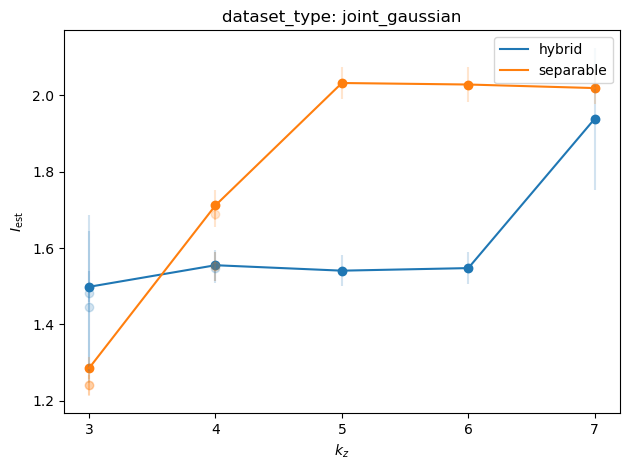

In [118]:
# results_df = pd.DataFrame(results)

# fig, ax = plt.subplots()
# for critic_type, df_sub in results_df.groupby("critic_type"):

            
#     axerr,_,_ = ax.errorbar(
#         df_sub["embed_dim"],
#         df_sub["max_smoothed_info"],
#         yerr= df_sub["std_smoothed_info"],
#         fmt='o', alpha=0.2)

#     # compute mean ± std
#     agg = (
#         df_sub.groupby("embed_dim")["max_smoothed_info"]
#         .agg(["max"])
#         .reset_index()
#     )

#     label = f"{critic_type}"


#     ax.plot(
#         agg["embed_dim"],
#         agg["max"],
#         label=label,
#         linewidth=1.5,  c=axerr.get_color()
#         )
#     ax.scatter(
#         agg["embed_dim"],
#         agg["max"],
#         c=axerr.get_color(), 
#         alpha=1.0
#         )

# # ax.axvline(low_dim, c='k', ls='--')
# # formatting
# # ax.set_xscale("log")
# ax.set_xlabel(r"$k_z$")
# ax.set_ylabel(r"$I_{\rm est}$")
# ax.legend()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_title(f'dataset_type: {dataset_type}' )
# plt.tight_layout()
# plt.show()